# Image Data Preprocessing
Maciej Pawlikowski
Jakub Grunas
Bartosz Siński


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import numpy as np
from PIL import Image

# Preprocessing pipeline

First we are reading images from all directories and we return single list where each item is and array representing single image. In our multiple data bases we have images only in .jpg and .png format. We have discovered this fact during exploration of our data. Images are automatically turned to grayscale. OpenCV is doing so by using particular codec for .jpg and .png.  so there is little information on how they exactly work.

In [2]:
def read_in_images(path_to_dir,n):
    # path_to_dir - path to directory with databases directories
    # n - number of images we want to load from every database
    images = []
    paths = os.listdir(path_to_dir)
    for path in paths:
        i = 0
        for p in os.listdir(os.path.join(path_to_dir,path,)):
            images.append(cv2.imread(os.path.join(path_to_dir,path, p),0))
            i +=1
            if i >= n:
                break
            # argument 0 transforms it to grayscale
    return images

We are resizing images to the 224x224 size which seems to be the most common input for best performing architectures of CNNs such as AlexNet, GoogLeNet and VGG. The resizing is done by using  Bi-linear interpolation which is default interpolation method in OpenCV.

In [3]:
def resize(images,height,width):
    #list of paths to images
    results = []
    dim = (height,width)
    for img in images:
        results.append(cv2.resize(img,dim))
        # we are using bilinear interpolation
    return results

Nowe we are normalizng images which means we are scaling values of pixels to be in 0-1 range. We are doing so in order to unify the input to our convolutional neural network. Moreover learning is said to be faster while working on values in 0-1 range and (-1)-1 range.

In [4]:
def normalize(images):
    results = []
    for img in images:
        arr  = np.array(img)
        if np.max(arr) >1:
            arr = arr/255
        results.append(arr)
    return results

Lastly we are centering values of pixels. It was mentioned in multiple articles to improve learning on most of best performing CNNs which were mentioned before. We are centering data by subtracting mean from individual values. Now the values are in (-1)-1 range so it means that they are also negative. However it is not a problem during CNN learning. Besides pyplot manages to show images with such values.

In [5]:
def center(images):
    # images_np - list of images
    results = []
    for img in images:
        arr = np.array(img)
        mn = np.mean(arr)
        results.append(arr - mn)
    return results

In pipeline function whe are joining every previous function in right order.

In [6]:
def pipeline(path,n):
    images = read_in_images(path,n)
    images_resized = resize(images,224,224)
    images_normalized = normalize(images_resized)
    results = center(images_normalized)
    return results

# Preprocessing results

Loading data from two directories with accordingly CT and X ray Images that are containing directories with images from every data base. For some data bases we have created artificial subsets because we did not have permission to share full database (in MIMIC case) or they where too large to share.

In [7]:
dir_path = 'sample_data_xray'
images_final_x = pipeline(dir_path,10)
images_raw_x= []
for p in os.listdir(dir_path):
    for img in os.listdir(os.path.join(dir_path,p)):
        images_raw_x.append(cv2.imread(os.path.join(dir_path,p,img)))
dir_path2 = 'sample_data_ct'
images_final_ct = pipeline(dir_path2,10)
images_raw_ct= []
for p in os.listdir(dir_path2):
    for img in os.listdir(os.path.join(dir_path2,p)):
        images_raw_ct.append(cv2.imread(os.path.join(dir_path2,p,img)))

In [8]:
def show_results(img):
    plt.imshow(img)
    print('Image shape: ',img.shape[0:2])
    if img.ndim == 2:
        print('Dimensions: ',img.ndim-1)
    else:
        print('Dimensions: ',img.ndim)
    print('Max pixel value: ',np.max(img))
    print('Min pixel value: ',np.min(img))
    print('Average pixel value: ',np.mean(img))

Raw image X-ray

Image shape:  (1444, 1596)
Dimensions:  3
Max pixel value:  255
Min pixel value:  0
Average pixel value:  118.37699338373635


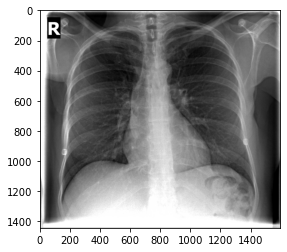

In [9]:
img_raw = images_raw_x[0]
show_results(img_raw)

Processed image X-ray

Image shape:  (224, 224)
Dimensions:  1
Max pixel value:  0.5351734443777512
Min pixel value:  -0.4648265556222489
Average pixel value:  6.797283824235652e-18


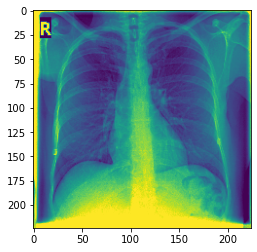

In [10]:
img_processed = images_final_x[0]
show_results(img_processed)

Raw image X-ray

Image shape:  (2430, 1994)
Dimensions:  3
Max pixel value:  255
Min pixel value:  0
Average pixel value:  161.5716317677312


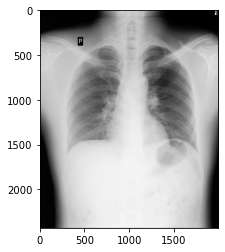

In [11]:
img_raw2 = images_raw_x[25]
show_results(img_raw2)

Processed image

Image shape:  (224, 224)
Dimensions:  1
Max pixel value:  0.36633606567627064
Min pixel value:  -0.6336639343237294
Average pixel value:  1.2688263138573217e-16


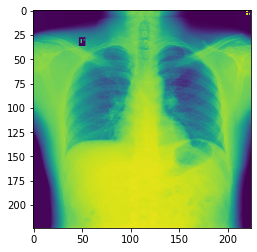

In [12]:
img_processed2 = images_final_x[25]
show_results(img_processed2)

Raw image CT

Image shape:  (541, 720)
Dimensions:  3
Max pixel value:  255
Min pixel value:  29
Average pixel value:  174.08171082357774


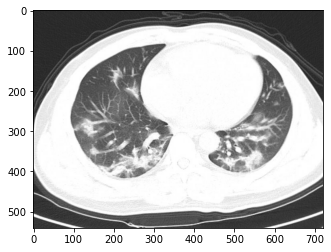

In [13]:
img_raw3 = images_raw_ct[6]
show_results(img_raw3)

Processed image CT

Image shape:  (224, 224)
Dimensions:  1
Max pixel value:  0.31774022108843536
Min pixel value:  -0.5489264455782313
Average pixel value:  -2.3790493384824782e-17


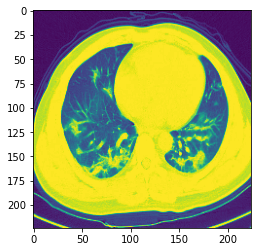

In [14]:
img_processed3 = images_final_ct[6]
show_results(img_processed3)

Raw Image CT

Image shape:  (512, 512)
Dimensions:  3
Max pixel value:  255
Min pixel value:  37
Average pixel value:  107.84197616577148


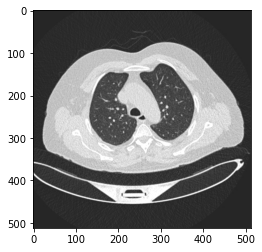

In [15]:
img_raw4 = images_raw_ct[13]
show_results(img_raw4)

Processed Image CT

Image shape:  (224, 224)
Dimensions:  1
Max pixel value:  0.5774851346788716
Min pixel value:  -0.27741682610544216
Average pixel value:  5.664403186863044e-17


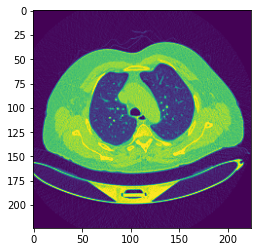

In [16]:
img_processed4 = images_final_ct[13]
show_results(img_processed4)